In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.regression.linear_model as lm
import statsmodels.tools.tools as ct

In [92]:
import statsmodels.api as sm

In [20]:
!pip install yfinance

In [21]:
import yfinance as yf

In [22]:
df_RF = pd.read_excel('CapMmodel.xlsx')
df_spy = pd.read_csv('SPY.csv')
df_fslr = pd.read_csv('FSLR.csv')

In [23]:
df_spy = df_spy.drop(labels=range(180, 183), axis=0)
df_spy['spyReturn'] = (df_spy['Close'] - df_spy['Open'])/df_spy['Open']

In [24]:
df_fslr = df_fslr.drop(labels=range(180, 183), axis=0)
df_fslr['fslrReturn']= (df_fslr['Close'] - df_fslr['Open'])/df_fslr['Open']

In [40]:
df_fslr

,Date,Open,High,Low,Close,Adj Close,Volume,fslrReturn
0,2007-01-01,30.170000,33.889999,27.540001,32.369999,32.369999,7595000,0.072920
1,2007-02-01,32.529999,52.700001,31.139999,47.750000,47.750000,21926900,0.467876
2,2007-03-01,46.150002,59.880001,42.599998,52.009998,52.009998,35374100,0.126977
3,2007-04-01,52.099998,65.599998,52.080002,59.990002,59.990002,30722200,0.151440
4,2007-05-01,58.990002,72.480003,54.200001,68.040001,68.040001,52934900,0.153416
...,...,...,...,...,...,...,...,...
175,2021-08-01,89.040001,97.550003,86.660004,94.000000,94.000000,30198800,0.055705
176,2021-09-01,94.459999,107.269997,90.180000,95.459999,95.459999,43096500,0.010586
177,2021-10-01,96.269997,120.900002,92.760002,119.589996,119.589996,38252000,0.242235
178,2021-11-01,120.250000,123.129997,101.129997,103.599998,103.599998,36316200,-0.138462


In [26]:
capdf = df_fslr[['Date','fslrReturn']].copy()
capdf['SPY'] = df_spy[['spyReturn']].copy() 
capdf['RF'] = df_RF[['RiskFreeRate']].copy()

In [27]:
capdf['SPY-RF'] = capdf['SPY'] - capdf['RF']
capdf['MKT-RF'] = capdf['fslrReturn'] - capdf['RF']

In [ ]:
capdf

In [96]:
traincapdf = capdf[:144]
traincapdf = traincapdf.drop(['fslrReturn','SPY', 'RF'], axis = 1)
testcapdf = capdf[144:]
testcapdf = testcapdf.drop(['fslrReturn','SPY'], axis = 1)

In [30]:
import datetime as dt

In [97]:
traincapdf.set_index('Date', inplace=True)
testcapdf.set_index('Date', inplace=True)

In [32]:
#traincapdf['CT'] = np.nan
#traincapdf = traincapdf.loc[:,'CT'] 
traincapdf  = ct.add_constant(traincapdf)
capm = lm.OLS(traincapdf['SPY-RF'], traincapdf[['const','MKT-RF']], hasconst = bool).fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [33]:
print('')
print(capm.summary())
print('')
print('CaPM Beta:', np.round((np.cov(traincapdf['SPY-RF'],traincapdf['MKT-RF'])/np.var(traincapdf['MKT-RF'],ddof = 1))[0,1],4))


                            OLS Regression Results                            
Dep. Variable:                 SPY-RF   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 1.912e+04
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          2.62e-153
Time:                        21:42:46   Log-Likelihood:                 51.083
No. Observations:                 144   AIC:                            -98.17
Df Residuals:                     142   BIC:                            -92.23
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0121      0.021     -0.587      0.

In [34]:
#expected_return = rf + beta*market_premium
#print("Expected monthly returns: " + str(expected_return))

In [17]:
#expected return function
#def expected_returncalc(testcapdf,beta):
  #for testcapdf in testcapdf.itertuples():
    #Expected_Return= np.asarray(testcapdf['RF']+beta(testcapdf['MKT-RF']))
    #print(Expected_Return)

In [88]:
beta = 1.0003
expected_return = pd.DataFrame(testcapdf['RF']+beta*(testcapdf['MKT-RF']), columns = ['Expected_Return'])

In [68]:
returns = np.log(df_fslr['Close']) - np.log(df_fslr['Open'])

In [69]:
from pandas.core.frame import DataFrame
test_returns = pd.DataFrame(returns[144:], columns = ['ln_returns'])
test_returns = test_returns.reset_index()

In [105]:
expected_return = expected_return.reset_index()

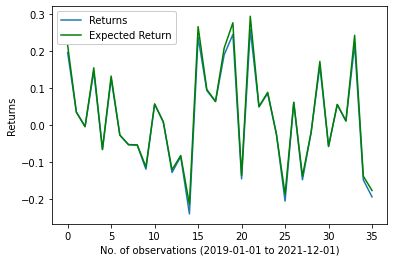

In [111]:
plt.plot(test_returns['ln_returns'], label = "Returns")
plt.plot(expected_return['Expected_Return'], label = "Expected Return", color = 'green')
#plt.plot(test2['MPE'], label = "test MPE", color = 'orange')
#plt.plot(further_forecastdf['furtherforecast'], label = 'further forecast', color = 'red')
#'2019-01-01' - '2021-12-01'
plt.legend(framealpha=1, frameon=True);
plt.ylabel("Returns")
plt.xlabel("No. of observations (2019-01-01 to 2021-12-01)")
#display plot
plt.show()

In [ ]:
test_returns

In [ ]:
residuals['ln_returns'] = test_returns[['ln_returns']].copy()
residuals['Expected_Return'] = expected_return[['Expected_Return']].copy() 
residuals['residuals'] = residuals['ln_returns']-residuals['Expected_Return']
residuals
#capdf = df_fslr[['Date','fslrReturn']].copy()
#capdf['SPY'] = df_spy[['spyReturn']].copy() 
#capdf['RF'] = df_RF[['RiskFreeRate']].copy()

In [84]:
from matplotlib import pyplot

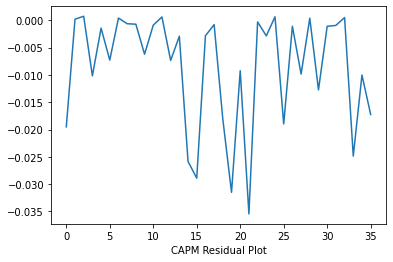

In [85]:
residuals.residuals.plot()
pyplot.xlabel('CAPM Residual Plot')
pyplot.show()

In [112]:
from sklearn import metrics

In [114]:
acc_returns = residuals['ln_returns'].to_numpy()

In [115]:
acc_expec = residuals['Expected_Return'].to_numpy()

In [121]:
metrics.mean_squared_error(acc_returns, acc_expec)

0.0001795812747191724

Mean squared error (MSE) is the most commonly used loss function for regression. The loss is the mean overseen data of the squared differences between true and predicted values, or writing it as a formula.